In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [5]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [6]:
df_txn = pd.read_csv("data\\txn.csv", sep=';')
df_sales = pd.read_csv("data\\sales.csv", sep=';')
df_prod = pd.read_csv('data\\art.csv', sep=';')

In [7]:
df_txn.head(3)

,DAY,STORE,ART,TXN,TIME,SALES
0,2015-11-05,22691,16548710,5877969776,17:23:57,"117,00000"
1,2015-10-24,20581,261204,5767364168,19:57:19,"140,17000"
2,2015-11-05,1574,16405210,5876151937,15:31:35,"26,90000"


In [8]:
df_txn['SALES'] = df_txn['SALES'].apply(lambda x: x.replace(',', '.')).astype(float)

In [9]:
df_txn['DAY'] = pd.to_datetime(df_txn['DAY'], format='%Y-%m-%d')

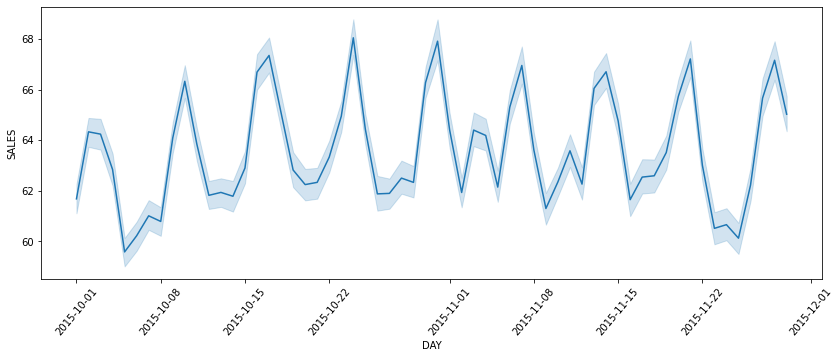

In [10]:
plt.figure(figsize=(14, 5))
sns.lineplot('DAY', 'SALES', data=df_txn)
plt.xticks(rotation=50)
plt.show()

In [11]:
df_txn = df_txn.sort_values(by=['DAY'])

<b>Рассчитать основные показатели:</b> 
1. Средний чек магазина
2. ср. кол-во чеков на 1 магазин. в день
3. ср. продажи на 1 магазин. в день (детализация до товара/группы не нужна).

#### Средний чек магазина по каждому дню

In [52]:
# Сумма каждого чека по магазинам
store_day_txn_sales = df_txn.groupby(by=['STORE', 'DAY', 'TXN'])['SALES'].sum()

In [54]:
# Средняя сумма по чекам
store_day_mean_txn = store_day_txn_sales.groupby(by=['STORE', 'DAY']).mean()
store_day_mean_txn.head(3)

STORE  DAY       
956    2015-10-01    228.584189
       2015-10-02    247.682926
       2015-10-03    232.513370
Name: SALES, dtype: float64

In [55]:
# Преобразование в таблицу
store_day_mean_txn = store_day_mean_txn.unstack(0).sort_index()
store_day_mean_txn.head(3)

STORE,956,958,961,974,980,999,1053,1082,1094,1122,...,17096,17474,19009,20581,21761,22691,24605,25039,27220,29245
DAY,,,,,,,,,,,,,,,,,,,,,
2015-10-01,228.584189,277.854557,331.063739,248.127198,264.572985,316.792187,248.345995,233.880785,266.421166,245.560327,...,246.038221,302.533732,219.294244,293.958554,240.743825,260.388124,240.253297,279.007516,292.614620,252.594192
2015-10-02,247.682926,285.929766,320.212698,251.682180,277.266675,350.831708,240.322689,247.945911,292.355551,283.620529,...,265.010130,321.513619,251.166528,262.991259,262.839413,285.989461,248.305928,283.711109,312.345174,295.587849
2015-10-03,232.513370,316.983611,322.072317,292.019290,260.913369,321.921526,253.234638,231.767804,312.002931,266.279708,...,265.880532,334.151068,253.717112,316.150830,279.722187,277.075860,261.254290,299.901229,324.559240,261.805465


#### Количесво уникальных чеков на каждый день для магазинов

In [14]:
# Количесво уникальных чеков на каждый день для магазинов
store_date_count_txn = df_txn.groupby(by=['STORE', 'DAY', ])['TXN'].nunique()

In [15]:
store_date_count_txn = store_date_count_txn.unstack(0).sort_index()
store_date_count_txn.head(3)

STORE,956,958,961,974,980,999,1053,1082,1094,1122,...,17096,17474,19009,20581,21761,22691,24605,25039,27220,29245
DAY,,,,,,,,,,,,,,,,,,,,,
2015-10-01,541,503,474,324,257,667,497,769,780,392,...,773,974,734,403,896,565,433,655,448,329
2015-10-02,615,541,500,298,253,652,517,813,770,400,...,735,946,691,432,795,576,402,635,442,370
2015-10-03,600,444,406,218,281,506,436,815,643,393,...,648,997,665,344,740,523,386,513,492,335


#### Средние продажи на 1 магазин. в день

In [95]:
# Сумма продаж в каждом чеке на каждый день
store_day_mean_sales = df_txn.groupby(by=['STORE', 'DAY'])['SALES'].mean()
store_day_mean_sales.head()

STORE  DAY       
956    2015-10-01    57.868061
       2015-10-02    62.249693
       2015-10-03    62.031135
       2015-10-04    61.699280
       2015-10-05    56.766015
Name: SALES, dtype: float64

In [96]:
store_day_mean_sales = store_day_mean_sales.unstack(0).sort_index()
store_day_mean_sales.head(3)

STORE,956,958,961,974,980,999,1053,1082,1094,1122,...,17096,17474,19009,20581,21761,22691,24605,25039,27220,29245
DAY,,,,,,,,,,,,,,,,,,,,,
2015-10-01,57.868061,66.679791,66.184822,58.982548,59.436414,69.256109,63.134506,63.507883,59.990909,62.546880,...,61.709132,60.296267,55.351436,67.043179,57.876702,60.742894,60.588047,61.970133,62.187547,61.558140
2015-10-02,62.249693,65.049623,67.928022,61.275563,63.253804,72.249613,59.993641,64.629697,63.519688,63.556421,...,65.473091,62.428548,60.705166,64.296674,58.221603,66.530666,61.051366,67.072433,64.572763,69.439685
2015-10-03,62.031135,69.742678,64.733347,63.980106,64.369321,71.601007,61.475669,64.578038,65.841117,60.700653,...,61.182736,65.284855,60.756888,70.666592,62.048687,64.807994,62.831250,62.136240,66.396319,63.738976


### Предсказывание данных

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# поиск лучших параметров - order(p,q)
sm.tsa.arma_order_select_ic(store_mean_day_sales[956], max_ar=7, max_ma=7, ic='aic', trend='c', )
# В результате параметры такие же как и стандартные

2.1 Средний чек магазина по каждому дню

In [80]:
def last_day_predictions(df_with_store_cols):
    """Learns SARIMAX (Seasonal AutoRegressive Integrated Moving Average) models
        to get result of predictions for next - 'last day'
    params:
        df_with_store_cols : dataframe with columns like shop_id and rows like datetime
    returns:
        results (list): list with results of predictions for each model
    """
    results = []
    # Создаем модель для каждого магазина и передаем данные на существующий период
    
    for shop_id in store_day_mean_txn.columns:
        # обучаем на текущем временном ряду 
        store_model = sm.tsa.statespace.SARIMAX(df_with_store_cols[shop_id][1:],  freq='D', enforce_stationarity=False, enforce_invertibility=False).fit()
        # предсказываем на след день. (без проверки точности и валидации т.к. интересует 1 день + множество моделей)
        store_res = store_model.predict(df_with_store_cols.shape[0]-1)[0]
        results.append(store_res) # добавляем результат
    return results

In [99]:
store_mean_txn_last_day = last_day_predictions(store_day_mean_txn)
print("Результаты - ожидаемая средняя сумма по чеку на 2015-11-30")
for store_id, store_res in zip(store_day_mean_txn.columns.values, np.array(store_mean_txn_last_day)):
    print(f"Магазин {store_id:>5} - {store_res:.5}")
# last_day_txn_sales = pd.DataFrame({"STORE": store_day_mean_txn.columns.values, "MEAN_TXN_SALES": np.array(store_mean_txn_last_day, dtype=int)})
# last_day_txn_sales

Результаты - ожидаемая средняя сумма по чеку на 2015-11-30
Магазин   956 - 251.7
Магазин   958 - 302.5
Магазин   961 - 343.27
Магазин   974 - 281.18
Магазин   980 - 270.88
Магазин   999 - 331.15
Магазин  1053 - 253.63
Магазин  1082 - 241.42
Магазин  1094 - 328.09
Магазин  1122 - 288.67
Магазин  1530 - 247.97
Магазин  1534 - 347.91
Магазин  1544 - 347.98
Магазин  1574 - 197.85
Магазин  1579 - 331.32
Магазин  1594 - 309.16
Магазин  1596 - 332.29
Магазин  1602 - 225.98
Магазин  1609 - 306.53
Магазин  1612 - 281.01
Магазин 17096 - 284.07
Магазин 17474 - 332.96
Магазин 19009 - 265.13
Магазин 20581 - 305.65
Магазин 21761 - 275.49
Магазин 22691 - 287.99
Магазин 24605 - 297.51
Магазин 25039 - 380.82
Магазин 27220 - 388.62
Магазин 29245 - 270.89


2.2 Количество чеков по магазинам

In [104]:
store_count_txns_last_day = last_day_predictions(store_date_count_txn)
print("Результаты - ожидаемое кол-во чеков на 2015-11-30")
for store_id, store_res in zip(store_date_count_txn.columns.values, np.array(store_count_txns_last_day, dtype=int)):
    print(f"Магазин {store_id:>5} - {store_res:<4} чеков")
# last_day_txns_count = pd.DataFrame({"STORE": store_date_count_txn.columns.values, "TXNS_COUNT": np.array(store_count_txns_last_day, dtype=int)})
# last_day_txns_count

Результаты - ожидаемое кол-во чеков на 2015-11-30
Магазин   956 - 522  чеков
Магазин   958 - 476  чеков
Магазин   961 - 406  чеков
Магазин   974 - 208  чеков
Магазин   980 - 184  чеков
Магазин   999 - 568  чеков
Магазин  1053 - 441  чеков
Магазин  1082 - 676  чеков
Магазин  1094 - 563  чеков
Магазин  1122 - 388  чеков
Магазин  1530 - 189  чеков
Магазин  1534 - 540  чеков
Магазин  1544 - 361  чеков
Магазин  1574 - 355  чеков
Магазин  1579 - 628  чеков
Магазин  1594 - 470  чеков
Магазин  1596 - 403  чеков
Магазин  1602 - 363  чеков
Магазин  1609 - 493  чеков
Магазин  1612 - 566  чеков
Магазин 17096 - 665  чеков
Магазин 17474 - 969  чеков
Магазин 19009 - 600  чеков
Магазин 20581 - 273  чеков
Магазин 21761 - 755  чеков
Магазин 22691 - 575  чеков
Магазин 24605 - 351  чеков
Магазин 25039 - 431  чеков
Магазин 27220 - 411  чеков
Магазин 29245 - 393  чеков


2.3 Средние продажи на 1 магазин. в день

<i>я так понял это средняя стоимость 1 товара (1 продажи)</i>

In [98]:
store_mean_sales_last_day = last_day_predictions(store_day_mean_sales)
print("Результаты - ожидаемые средние продажи на 2015-11-30")
for store_id, store_res in zip(store_day_mean_sales.columns.values, np.array(store_mean_sales_last_day, dtype=float)):
    print(f"Магазин {store_id:>5} - {store_res:.5}")
# last_day_txns_count = pd.DataFrame({"STORE": store_date_count_txn.columns.values, "TXNS_COUNT": np.array(store_mean_txn_last_day, dtype=int)})
# last_day_txns_count

Результаты - ожидаемые средние продажи на 2015-11-30


ValueError: Precision not allowed in integer format specifier